In [1]:
import pandas as pd

In [2]:
# loading the exercise file

df = pd.read_excel('/Users/akshaykumar1239/Downloads/Excercise.xlsx')
df.head(10)

,Date,Tick,Value,XYZ,D
0,2019-01-01,09:16:00,10912.00,A,0
1,2019-01-01,09:16:00,181.20,C,10900
2,2019-01-01,09:16:00,193.55,B,10900
3,2019-01-01,09:16:00,10912.00,A,0
4,2019-01-01,09:16:00,181.20,C,10900
5,2019-01-01,09:16:00,193.55,B,10900
6,2019-01-01,09:17:00,194.05,B,10900
7,2019-01-01,09:17:00,10912.85,A,0
8,2019-01-01,09:17:00,181.25,C,10900
9,2019-01-01,09:18:00,192.00,B,10900


In [3]:
# I can see some duplicates, so removing duplicates

df.drop_duplicates(inplace = True)
df.head(7)

,Date,Tick,Value,XYZ,D
0,2019-01-01,09:16:00,10912.00,A,0
1,2019-01-01,09:16:00,181.20,C,10900
2,2019-01-01,09:16:00,193.55,B,10900
6,2019-01-01,09:17:00,194.05,B,10900
7,2019-01-01,09:17:00,10912.85,A,0
8,2019-01-01,09:17:00,181.25,C,10900
9,2019-01-01,09:18:00,192.00,B,10900


In [4]:
# to get data for ABC stocks, I can just pivot the table

df_ABC = df.pivot_table(index=['Date','Tick'], columns='XYZ', values='Value')
df_ABC

XYZ                         A       B       C
Date       Tick                              
2019-01-01 09:16:00  10912.00  193.55  181.20
           09:17:00  10912.85  194.05  181.25
           09:18:00  10910.90  192.00  182.45
           09:19:00  10897.00  185.80  189.80
           09:20:00  10872.15  173.25  201.45
...                       ...     ...     ...
2019-01-31 15:26:00  10853.35     NaN     NaN
           15:27:00  10852.00     NaN     NaN
           15:28:00  10848.10     NaN     NaN
           15:29:00  10847.00     NaN     NaN
           15:30:00  10850.00     NaN     NaN

[7875 rows x 3 columns]

In [5]:
# resetting the index

df_ABC.reset_index(inplace = True)
df_ABC

XYZ,Date,Tick,A,B,C
0,2019-01-01,09:16:00,10912.00,193.55,181.20
1,2019-01-01,09:17:00,10912.85,194.05,181.25
2,2019-01-01,09:18:00,10910.90,192.00,182.45
3,2019-01-01,09:19:00,10897.00,185.80,189.80
4,2019-01-01,09:20:00,10872.15,173.25,201.45
...,...,...,...,...,...
7870,2019-01-31,15:26:00,10853.35,NaN,NaN
7871,2019-01-31,15:27:00,10852.00,NaN,NaN
7872,2019-01-31,15:28:00,10848.10,NaN,NaN
7873,2019-01-31,15:29:00,10847.00,NaN,NaN


In [6]:
# there's no data for B and C on 31st January

df_ABC.isnull().sum()

XYZ
Date      0
Tick      0
A         0
B       375
C       375
dtype: int64

In [7]:
df_ABC

XYZ,Date,Tick,A,B,C
0,2019-01-01,09:16:00,10912.00,193.55,181.20
1,2019-01-01,09:17:00,10912.85,194.05,181.25
2,2019-01-01,09:18:00,10910.90,192.00,182.45
3,2019-01-01,09:19:00,10897.00,185.80,189.80
4,2019-01-01,09:20:00,10872.15,173.25,201.45
...,...,...,...,...,...
7870,2019-01-31,15:26:00,10853.35,NaN,NaN
7871,2019-01-31,15:27:00,10852.00,NaN,NaN
7872,2019-01-31,15:28:00,10848.10,NaN,NaN
7873,2019-01-31,15:29:00,10847.00,NaN,NaN


In [8]:
df_D = df.drop(['XYZ', "Value"], axis = 1)
df_D

,Date,Tick,D
0,2019-01-01,09:16:00,0
1,2019-01-01,09:16:00,10900
2,2019-01-01,09:16:00,10900
6,2019-01-01,09:17:00,10900
7,2019-01-01,09:17:00,0
...,...,...,...
22873,2019-01-31,15:26:00,0
22874,2019-01-31,15:27:00,0
22875,2019-01-31,15:28:00,0
22876,2019-01-31,15:29:00,0


In [9]:
# removed all the duplicates and only kept positive values

df_D.drop_duplicates(inplace = True)
df_D = df_D[df_D['D'] != 0]
df_D

,Date,Tick,D
1,2019-01-01,09:16:00,10900
6,2019-01-01,09:17:00,10900
9,2019-01-01,09:18:00,10900
12,2019-01-01,09:19:00,10900
15,2019-01-01,09:20:00,10900
...,...,...,...
22488,2019-01-30,14:10:00,10700
22491,2019-01-30,14:11:00,10700
22494,2019-01-30,14:12:00,10700
22497,2019-01-30,14:13:00,10700


In [10]:
df_D.isnull().sum()

Date    0
Tick    0
D       0
dtype: int64

# My step-1 is complete here

In [11]:
# so to not lose that data I used inner join
# A has 375 extra data points that can be useful so instead of losing that data
# I'm gonna use outer joint

df = df_ABC.merge(df_D, how = 'outer', on = ['Date', 'Tick'])
df

,Date,Tick,A,B,C,D
0,2019-01-01,09:16:00,10912.00,193.55,181.20,10900.0
1,2019-01-01,09:17:00,10912.85,194.05,181.25,10900.0
2,2019-01-01,09:18:00,10910.90,192.00,182.45,10900.0
3,2019-01-01,09:19:00,10897.00,185.80,189.80,10900.0
4,2019-01-01,09:20:00,10872.15,173.25,201.45,10900.0
...,...,...,...,...,...,...
7870,2019-01-31,15:26:00,10853.35,NaN,NaN,NaN
7871,2019-01-31,15:27:00,10852.00,NaN,NaN,NaN
7872,2019-01-31,15:28:00,10848.10,NaN,NaN,NaN
7873,2019-01-31,15:29:00,10847.00,NaN,NaN,NaN


In [12]:
# I need the last tick data 
# I just wanted to add a index column to later use in merging

last_tick = df[df['Tick'] == df['Tick'].max()]
last_tick.reset_index(inplace = True, drop = True)
last_tick.reset_index(inplace = True)
last_tick

,index,Date,Tick,A,B,C,D
0,0,2019-01-01,15:30:00,10962.20,211.00,150.00,10900.0
1,1,2019-01-02,15:30:00,10825.95,146.00,222.10,10900.0
2,2,2019-01-03,15:30:00,10717.00,143.00,225.05,10800.0
3,3,2019-01-08,15:30:00,10833.50,176.00,144.60,10800.0
4,4,2019-01-09,15:30:00,10873.20,132.50,158.00,10900.0
5,5,2019-01-10,15:30:00,10853.95,119.90,167.25,10900.0
6,6,2019-01-11,15:30:00,10813.50,100.50,185.95,10900.0
7,7,2019-01-14,15:30:00,10770.80,120.00,152.95,10800.0
8,8,2019-01-15,15:30:00,10927.30,142.25,118.00,10900.0
9,9,2019-01-16,15:30:00,10921.20,85.00,162.00,11000.0


In [13]:
# all of the first tick data

first_tick = df[df['Tick'] == df['Tick'].min()]
first_tick.reset_index(inplace = True, drop = True)
first_tick.reset_index(inplace = True)
first_tick['index'] = first_tick['index'] + 1
first_tick

/var/folders/63/nsh9kx_10g712y2x452w_w380000gn/T/ipykernel_11369/686776922.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  first_tick['index'] = first_tick['index'] + 1


,index,Date,Tick,A,B,C,D
0,1,2019-01-01,09:16:00,10912.00,193.55,181.20,10900.0
1,2,2019-01-02,09:16:00,10888.00,170.05,183.25,10900.0
2,3,2019-01-03,09:16:00,10814.50,194.95,182.55,10800.0
3,4,2019-01-08,09:16:00,10793.60,162.70,169.50,10800.0
4,5,2019-01-09,09:16:00,10892.75,145.55,151.70,10900.0
5,6,2019-01-10,09:16:00,10871.95,131.70,160.20,10900.0
6,7,2019-01-11,09:16:00,10873.15,127.40,155.00,10900.0
7,8,2019-01-14,09:16:00,10785.00,137.60,153.95,10800.0
8,9,2019-01-15,09:16:00,10815.00,88.50,171.85,10900.0
9,10,2019-01-16,09:16:00,10942.45,96.00,156.00,11000.0


In [14]:
data = first_tick.merge(last_tick, on = ('index'))
data

,index,Date_x,Tick_x,A_x,B_x,C_x,D_x,Date_y,Tick_y,A_y,B_y,C_y,D_y
0,1,2019-01-01,09:16:00,10912.00,193.55,181.20,10900.0,2019-01-02,15:30:00,10825.95,146.00,222.10,10900.0
1,2,2019-01-02,09:16:00,10888.00,170.05,183.25,10900.0,2019-01-03,15:30:00,10717.00,143.00,225.05,10800.0
2,3,2019-01-03,09:16:00,10814.50,194.95,182.55,10800.0,2019-01-08,15:30:00,10833.50,176.00,144.60,10800.0
3,4,2019-01-08,09:16:00,10793.60,162.70,169.50,10800.0,2019-01-09,15:30:00,10873.20,132.50,158.00,10900.0
4,5,2019-01-09,09:16:00,10892.75,145.55,151.70,10900.0,2019-01-10,15:30:00,10853.95,119.90,167.25,10900.0
5,6,2019-01-10,09:16:00,10871.95,131.70,160.20,10900.0,2019-01-11,15:30:00,10813.50,100.50,185.95,10900.0
6,7,2019-01-11,09:16:00,10873.15,127.40,155.00,10900.0,2019-01-14,15:30:00,10770.80,120.00,152.95,10800.0
7,8,2019-01-14,09:16:00,10785.00,137.60,153.95,10800.0,2019-01-15,15:30:00,10927.30,142.25,118.00,10900.0
8,9,2019-01-15,09:16:00,10815.00,88.50,171.85,10900.0,2019-01-16,15:30:00,10921.20,85.00,162.00,11000.0
9,10,2019-01-16,09:16:00,10942.45,96.00,156.00,11000.0,2019-01-17,15:30:00,10915.00,121.90,110.35,10900.0


In [15]:
# calculating daily pnl

data['A_pnl'] = data.apply(lambda row:row['A_y'] - row['A_x'], axis = 1)
data['B_pnl'] = data.apply(lambda row:row['B_y'] - row['B_x'], axis = 1)
data['C_pnl'] = data.apply(lambda row:row['C_y'] - row['C_x'], axis = 1)
data

,index,Date_x,Tick_x,A_x,B_x,C_x,D_x,Date_y,Tick_y,A_y,B_y,C_y,D_y,A_pnl,B_pnl,C_pnl
0,1,2019-01-01,09:16:00,10912.00,193.55,181.20,10900.0,2019-01-02,15:30:00,10825.95,146.00,222.10,10900.0,-86.05,-47.55,40.90
1,2,2019-01-02,09:16:00,10888.00,170.05,183.25,10900.0,2019-01-03,15:30:00,10717.00,143.00,225.05,10800.0,-171.00,-27.05,41.80
2,3,2019-01-03,09:16:00,10814.50,194.95,182.55,10800.0,2019-01-08,15:30:00,10833.50,176.00,144.60,10800.0,19.00,-18.95,-37.95
3,4,2019-01-08,09:16:00,10793.60,162.70,169.50,10800.0,2019-01-09,15:30:00,10873.20,132.50,158.00,10900.0,79.60,-30.20,-11.50
4,5,2019-01-09,09:16:00,10892.75,145.55,151.70,10900.0,2019-01-10,15:30:00,10853.95,119.90,167.25,10900.0,-38.80,-25.65,15.55
5,6,2019-01-10,09:16:00,10871.95,131.70,160.20,10900.0,2019-01-11,15:30:00,10813.50,100.50,185.95,10900.0,-58.45,-31.20,25.75
6,7,2019-01-11,09:16:00,10873.15,127.40,155.00,10900.0,2019-01-14,15:30:00,10770.80,120.00,152.95,10800.0,-102.35,-7.40,-2.05
7,8,2019-01-14,09:16:00,10785.00,137.60,153.95,10800.0,2019-01-15,15:30:00,10927.30,142.25,118.00,10900.0,142.30,4.65,-35.95
8,9,2019-01-15,09:16:00,10815.00,88.50,171.85,10900.0,2019-01-16,15:30:00,10921.20,85.00,162.00,11000.0,106.20,-3.50,-9.85
9,10,2019-01-16,09:16:00,10942.45,96.00,156.00,11000.0,2019-01-17,15:30:00,10915.00,121.90,110.35,10900.0,-27.45,25.90,-45.65


In [16]:
# extracting wanted columns

data = data[['index', 'A_pnl', 'B_pnl', 'C_pnl']]
data.rename({'index' : 'Day No.'}, axis = 1)

,Day No.,A_pnl,B_pnl,C_pnl
0,1,-86.05,-47.55,40.90
1,2,-171.00,-27.05,41.80
2,3,19.00,-18.95,-37.95
3,4,79.60,-30.20,-11.50
4,5,-38.80,-25.65,15.55
5,6,-58.45,-31.20,25.75
6,7,-102.35,-7.40,-2.05
7,8,142.30,4.65,-35.95
8,9,106.20,-3.50,-9.85
9,10,-27.45,25.90,-45.65


In [17]:
# calculating total pnl

data['total_pnl_A'] = data['A_pnl'].cumsum()
data['total_pnl_B'] = data['B_pnl'].cumsum()
data['total_pnl_C'] = data['C_pnl'].cumsum()
data

/var/folders/63/nsh9kx_10g712y2x452w_w380000gn/T/ipykernel_11369/3439409847.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['total_pnl_A'] = data['A_pnl'].cumsum()
/var/folders/63/nsh9kx_10g712y2x452w_w380000gn/T/ipykernel_11369/3439409847.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['total_pnl_B'] = data['B_pnl'].cumsum()
/var/folders/63/nsh9kx_10g712y2x452w_w380000gn/T/ipykernel_11369/3439409847.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Dat

,index,A_pnl,B_pnl,C_pnl,total_pnl_A,total_pnl_B,total_pnl_C
0,1,-86.05,-47.55,40.90,-86.05,-47.55,40.90
1,2,-171.00,-27.05,41.80,-257.05,-74.60,82.70
2,3,19.00,-18.95,-37.95,-238.05,-93.55,44.75
3,4,79.60,-30.20,-11.50,-158.45,-123.75,33.25
4,5,-38.80,-25.65,15.55,-197.25,-149.40,48.80
5,6,-58.45,-31.20,25.75,-255.70,-180.60,74.55
6,7,-102.35,-7.40,-2.05,-358.05,-188.00,72.50
7,8,142.30,4.65,-35.95,-215.75,-183.35,36.55
8,9,106.20,-3.50,-9.85,-109.55,-186.85,26.70
9,10,-27.45,25.90,-45.65,-137.00,-160.95,-18.95


In [18]:
# Saving a copy of this data
df2 = data.drop(['index'], axis = 1)

Note : there will be one extra data point in A because the 31st Jan dara is available for A and not fot B,C

In [19]:
# importing library to plot data

import matplotlib.pyplot as plt
%matplotlib inline

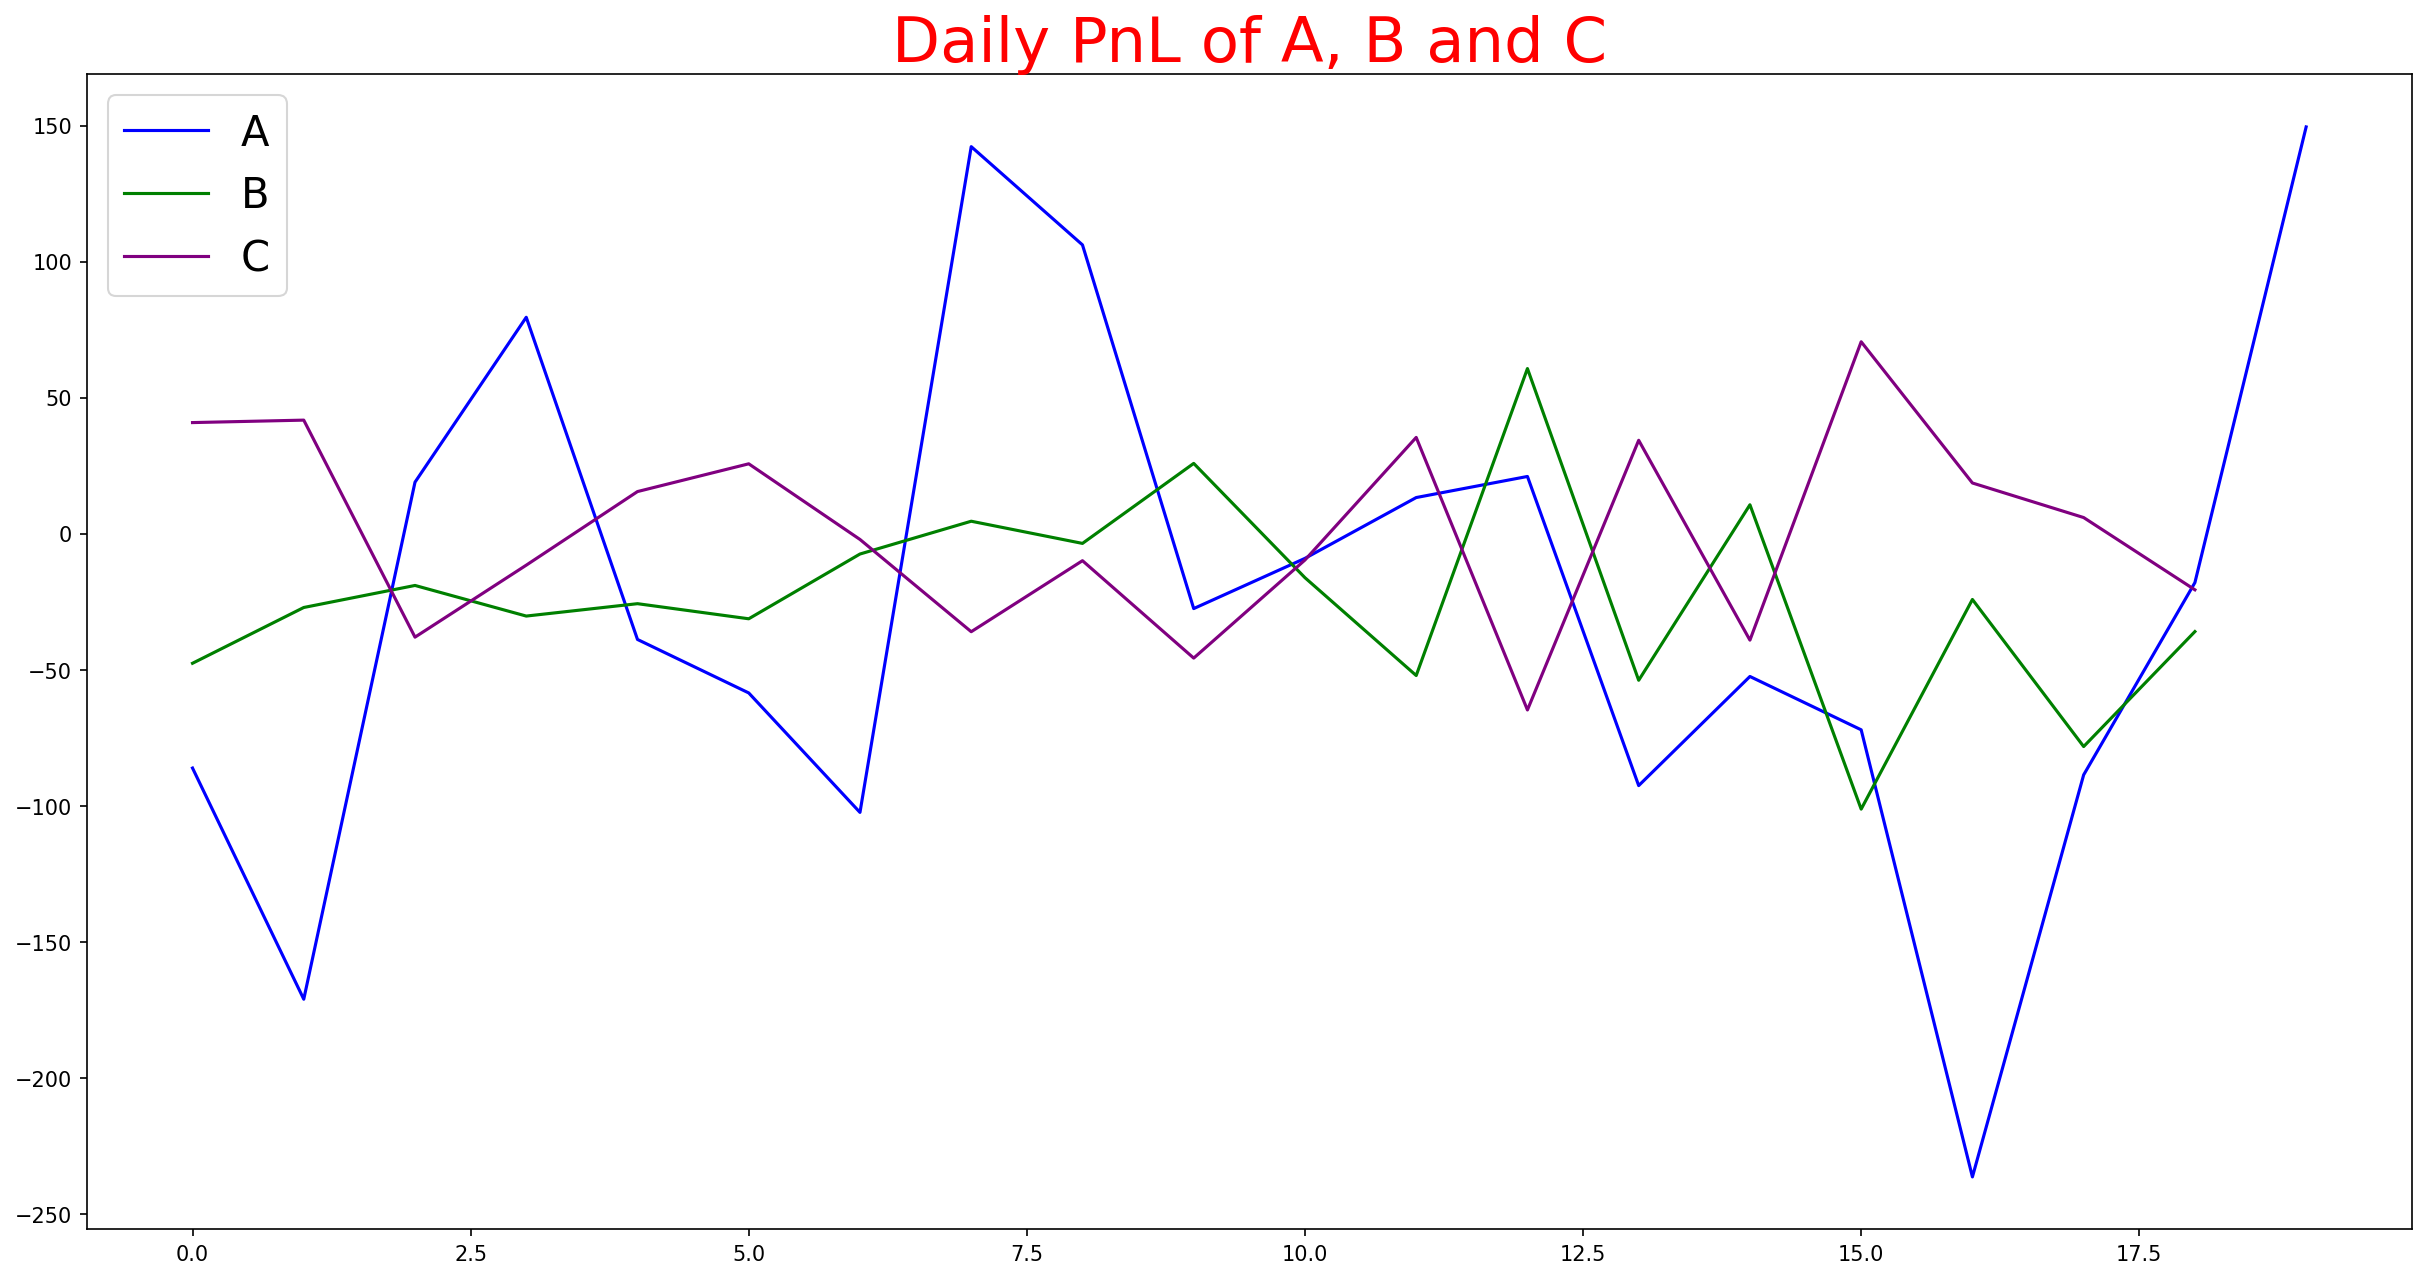

In [20]:
plt.figure(figsize=(20, 10), dpi=150) 

data['A_pnl'].plot(label='A', color='blue') 
data['B_pnl'].plot(label='B', color='green') 
data['C_pnl'].plot(label='C', color='purple') 

plt.title("Daily PnL of A, B and C", fontsize = 30, color = 'red')
plt.savefig('graph.png')
plt.legend(fontsize = 20)

In [21]:
data

,index,A_pnl,B_pnl,C_pnl,total_pnl_A,total_pnl_B,total_pnl_C
0,1,-86.05,-47.55,40.90,-86.05,-47.55,40.90
1,2,-171.00,-27.05,41.80,-257.05,-74.60,82.70
2,3,19.00,-18.95,-37.95,-238.05,-93.55,44.75
3,4,79.60,-30.20,-11.50,-158.45,-123.75,33.25
4,5,-38.80,-25.65,15.55,-197.25,-149.40,48.80
5,6,-58.45,-31.20,25.75,-255.70,-180.60,74.55
6,7,-102.35,-7.40,-2.05,-358.05,-188.00,72.50
7,8,142.30,4.65,-35.95,-215.75,-183.35,36.55
8,9,106.20,-3.50,-9.85,-109.55,-186.85,26.70
9,10,-27.45,25.90,-45.65,-137.00,-160.95,-18.95


# Created a drawdown function(not in terms of percentage : as asked in exercise)

In [22]:
# creating the drawdown calculator function

def calculate_drawdown(pnl_series):
    cumulative_pnl = pnl_series.cumsum()
    peak_value = cumulative_pnl.cummax()
    drawdown = (peak_value - cumulative_pnl)

    return drawdown.max()

In [23]:
# calculating drawdpwn for ABC

drawdown_A = calculate_drawdown(data['A_pnl'])
drawdown_B = calculate_drawdown(data['B_pnl'])
drawdown_C = calculate_drawdown(data['C_pnl'])
drawdown_A, drawdown_B, drawdown_C

(585.1499999999996, 403.2, 145.14999999999998)

In [24]:
# calculating standard deviation for A, B, C

std_A = data['A_pnl'].std()
std_B = data['B_pnl'].std()
std_C = data['C_pnl'].std()
std_A, std_B, std_C

(97.5948314461376, 36.39098777483335, 36.057455977633076)

In [25]:
# creating a final_table dataframe

final_table = pd.DataFrame(columns = ['Type', 'No. of Pofitable trades', 
                                      'No. of loss making trades', 'Average PnL per trade', 
                                      'Drawdown', 'Sharpe'])
final_table

,Type,No. of Pofitable trades,No. of loss making trades,Average PnL per trade,Drawdown,Sharpe


In [26]:
# inserting the values

final_table.loc[len(final_table)] = {'Type':'A',
                                    'No. of Pofitable trades': (data['A_pnl'] > 0).sum(),
                                    'No. of loss making trades' : (data['A_pnl'] < 0).sum(),
                                    'Average PnL per trade' : data['A_pnl'].mean(),
                                    'Drawdown':drawdown_A,
                                    'Sharpe':(data.loc[19, 'total_pnl_A']/std_A)}
final_table.loc[len(final_table)] = {'Type':'B',
                                    'No. of Pofitable trades': (data['B_pnl'] > 0).sum(),
                                    'No. of loss making trades' : (data['B_pnl'] < 0).sum(),
                                    'Average PnL per trade' : data['B_pnl'].mean(),
                                    'Drawdown':drawdown_B,
                                    'Sharpe':(data.loc[18, 'total_pnl_B']/std_B)}
final_table.loc[len(final_table)] = {'Type':'C',
                                    'No. of Pofitable trades': (data['C_pnl'] > 0).sum(),
                                    'No. of loss making trades' : (data['C_pnl'] < 0).sum(),
                                    'Average PnL per trade' : data['C_pnl'].mean(),
                                    'Drawdown':drawdown_C,
                                    'Sharpe':(data.loc[18, 'total_pnl_C']/std_C)}

# My step 2 is done here

In [27]:
final_table

,Type,No. of Pofitable trades,No. of loss making trades,Average PnL per trade,Drawdown,Sharpe
0,A,7,13,-26.082500,585.15,-5.345058
1,B,4,15,-23.723684,403.20,-12.386308
2,C,9,10,0.647368,145.15,0.341122


In [28]:
# saving data

df3 = final_table

In [29]:
# for the third step, I need data for second last tick

df1 = df[df['Tick'] != df['Tick'].max()]
second_last_tick = df1[df1['Tick'] == df1['Tick'].max()]
second_last_tick.reset_index(inplace = True, drop = True)
second_last_tick

,Date,Tick,A,B,C,D
0,2019-01-01,15:29:00,10965.00,212.20,148.50,10900.0
1,2019-01-02,15:29:00,10825.15,146.80,220.00,10900.0
2,2019-01-03,15:29:00,10720.00,144.55,224.00,10800.0
3,2019-01-08,15:29:00,10836.55,178.80,143.50,10800.0
4,2019-01-09,15:29:00,10873.00,131.75,160.20,10900.0
5,2019-01-10,15:29:00,10852.45,119.75,167.00,10900.0
6,2019-01-11,15:29:00,10814.40,101.05,185.40,10900.0
7,2019-01-14,15:29:00,10773.80,122.65,151.35,10800.0
8,2019-01-15,15:29:00,10926.00,143.00,117.90,10900.0
9,2019-01-16,15:29:00,10922.60,84.50,162.50,11000.0


In [30]:
# relative value = B - C + D - A

second_last_tick['Relative Value'] = second_last_tick.apply(lambda i:i['B']-i['C']+i['D']-i['A'], axis = 1)
second_last_tick = second_last_tick[['Date','Relative Value']]
second_last_tick

/var/folders/63/nsh9kx_10g712y2x452w_w380000gn/T/ipykernel_11369/3818418497.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  second_last_tick['Relative Value'] = second_last_tick.apply(lambda i:i['B']-i['C']+i['D']-i['A'], axis = 1)


,Date,Relative Value
0,2019-01-01,-1.30
1,2019-01-02,1.65
2,2019-01-03,0.55
3,2019-01-08,-1.25
4,2019-01-09,-1.45
5,2019-01-10,0.30
6,2019-01-11,1.25
7,2019-01-14,-2.50
8,2019-01-15,-0.90
9,2019-01-16,-0.60


In [31]:
# adjusting the index column to merge first and last ticks
first_tick['index'] = first_tick['index'].apply(lambda i:i-2)
first_tick

/var/folders/63/nsh9kx_10g712y2x452w_w380000gn/T/ipykernel_11369/4277832386.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  first_tick['index'] = first_tick['index'].apply(lambda i:i-2)


,index,Date,Tick,A,B,C,D
0,-1,2019-01-01,09:16:00,10912.00,193.55,181.20,10900.0
1,0,2019-01-02,09:16:00,10888.00,170.05,183.25,10900.0
2,1,2019-01-03,09:16:00,10814.50,194.95,182.55,10800.0
3,2,2019-01-08,09:16:00,10793.60,162.70,169.50,10800.0
4,3,2019-01-09,09:16:00,10892.75,145.55,151.70,10900.0
5,4,2019-01-10,09:16:00,10871.95,131.70,160.20,10900.0
6,5,2019-01-11,09:16:00,10873.15,127.40,155.00,10900.0
7,6,2019-01-14,09:16:00,10785.00,137.60,153.95,10800.0
8,7,2019-01-15,09:16:00,10815.00,88.50,171.85,10900.0
9,8,2019-01-16,09:16:00,10942.45,96.00,156.00,11000.0


In [32]:
# merging first day's last tick and next day's first tick

data = last_tick.merge(first_tick, on = 'index')
data

,index,Date_x,Tick_x,A_x,B_x,C_x,D_x,Date_y,Tick_y,A_y,B_y,C_y,D_y
0,0,2019-01-01,15:30:00,10962.20,211.00,150.00,10900.0,2019-01-02,09:16:00,10888.00,170.05,183.25,10900.0
1,1,2019-01-02,15:30:00,10825.95,146.00,222.10,10900.0,2019-01-03,09:16:00,10814.50,194.95,182.55,10800.0
2,2,2019-01-03,15:30:00,10717.00,143.00,225.05,10800.0,2019-01-08,09:16:00,10793.60,162.70,169.50,10800.0
3,3,2019-01-08,15:30:00,10833.50,176.00,144.60,10800.0,2019-01-09,09:16:00,10892.75,145.55,151.70,10900.0
4,4,2019-01-09,15:30:00,10873.20,132.50,158.00,10900.0,2019-01-10,09:16:00,10871.95,131.70,160.20,10900.0
5,5,2019-01-10,15:30:00,10853.95,119.90,167.25,10900.0,2019-01-11,09:16:00,10873.15,127.40,155.00,10900.0
6,6,2019-01-11,15:30:00,10813.50,100.50,185.95,10900.0,2019-01-14,09:16:00,10785.00,137.60,153.95,10800.0
7,7,2019-01-14,15:30:00,10770.80,120.00,152.95,10800.0,2019-01-15,09:16:00,10815.00,88.50,171.85,10900.0
8,8,2019-01-15,15:30:00,10927.30,142.25,118.00,10900.0,2019-01-16,09:16:00,10942.45,96.00,156.00,11000.0
9,9,2019-01-16,15:30:00,10921.20,85.00,162.00,11000.0,2019-01-17,09:16:00,10944.00,146.10,105.35,10900.0


In [33]:
# mergining with relative values

data = data.merge(second_last_tick, left_on = 'Date_x', right_on = 'Date')
data

,index,Date_x,Tick_x,A_x,B_x,C_x,D_x,Date_y,Tick_y,A_y,B_y,C_y,D_y,Date,Relative Value
0,0,2019-01-01,15:30:00,10962.20,211.00,150.00,10900.0,2019-01-02,09:16:00,10888.00,170.05,183.25,10900.0,2019-01-01,-1.30
1,1,2019-01-02,15:30:00,10825.95,146.00,222.10,10900.0,2019-01-03,09:16:00,10814.50,194.95,182.55,10800.0,2019-01-02,1.65
2,2,2019-01-03,15:30:00,10717.00,143.00,225.05,10800.0,2019-01-08,09:16:00,10793.60,162.70,169.50,10800.0,2019-01-03,0.55
3,3,2019-01-08,15:30:00,10833.50,176.00,144.60,10800.0,2019-01-09,09:16:00,10892.75,145.55,151.70,10900.0,2019-01-08,-1.25
4,4,2019-01-09,15:30:00,10873.20,132.50,158.00,10900.0,2019-01-10,09:16:00,10871.95,131.70,160.20,10900.0,2019-01-09,-1.45
5,5,2019-01-10,15:30:00,10853.95,119.90,167.25,10900.0,2019-01-11,09:16:00,10873.15,127.40,155.00,10900.0,2019-01-10,0.30
6,6,2019-01-11,15:30:00,10813.50,100.50,185.95,10900.0,2019-01-14,09:16:00,10785.00,137.60,153.95,10800.0,2019-01-11,1.25
7,7,2019-01-14,15:30:00,10770.80,120.00,152.95,10800.0,2019-01-15,09:16:00,10815.00,88.50,171.85,10900.0,2019-01-14,-2.50
8,8,2019-01-15,15:30:00,10927.30,142.25,118.00,10900.0,2019-01-16,09:16:00,10942.45,96.00,156.00,11000.0,2019-01-15,-0.90
9,9,2019-01-16,15:30:00,10921.20,85.00,162.00,11000.0,2019-01-17,09:16:00,10944.00,146.10,105.35,10900.0,2019-01-16,-0.60


In [34]:
# condiitonal data based on relative value

data_1 = data[data['Relative Value']<-2] 
data_2 = data[data['Relative Value']>1.5]

In [35]:
data_1

,index,Date_x,Tick_x,A_x,B_x,C_x,D_x,Date_y,Tick_y,A_y,B_y,C_y,D_y,Date,Relative Value
7,7,2019-01-14,15:30:00,10770.80,120.00,152.95,10800.0,2019-01-15,09:16:00,10815.0,88.5,171.85,10900.0,2019-01-14,-2.50
12,12,2019-01-21,15:30:00,10964.50,87.95,125.05,11000.0,2019-01-22,09:16:00,10937.5,130.4,93.85,10900.0,2019-01-21,-2.60
17,17,2019-01-28,15:30:00,10695.15,70.00,80.00,10700.0,2019-01-29,09:16:00,10650.9,49.5,100.55,10700.0,2019-01-28,-2.45


In [36]:
data_2

,index,Date_x,Tick_x,A_x,B_x,C_x,D_x,Date_y,Tick_y,A_y,B_y,C_y,D_y,Date,Relative Value
1,1,2019-01-02,15:30:00,10825.95,146.0,222.1,10900.0,2019-01-03,09:16:00,10814.5,194.95,182.55,10800.0,2019-01-02,1.65


In [37]:
# first condition applied for relative value < -2

data_1['Buy Value'] = -(data_1.apply(lambda x:-x['B_x'] + x['C_x'] + x['A_x'], axis = 1))

data_1['Sell Value'] = -(data_1.apply(lambda x:x['C_y'] + x['A_y'] - x['B_y'], axis = 1))

data_1['Pnl'] = data_1.apply(lambda x : x['Sell Value'] - x['Buy Value'], axis = 1)

data_1

/var/folders/63/nsh9kx_10g712y2x452w_w380000gn/T/ipykernel_11369/1141932858.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_1['Buy Value'] = -(data_1.apply(lambda x:-x['B_x'] + x['C_x'] + x['A_x'], axis = 1))
/var/folders/63/nsh9kx_10g712y2x452w_w380000gn/T/ipykernel_11369/1141932858.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_1['Sell Value'] = -(data_1.apply(lambda x:x['C_y'] + x['A_y'] - x['B_y'], axis = 1))
/var/folders/63/nsh9kx_10g712y2x452w_w380000gn/T/ipykernel_11369/1141932858.

,index,Date_x,Tick_x,A_x,B_x,C_x,D_x,Date_y,Tick_y,A_y,B_y,C_y,D_y,Date,Relative Value,Buy Value,Sell Value,Pnl
7,7,2019-01-14,15:30:00,10770.80,120.00,152.95,10800.0,2019-01-15,09:16:00,10815.0,88.5,171.85,10900.0,2019-01-14,-2.50,-10803.75,-10898.35,-94.60
12,12,2019-01-21,15:30:00,10964.50,87.95,125.05,11000.0,2019-01-22,09:16:00,10937.5,130.4,93.85,10900.0,2019-01-21,-2.60,-11001.60,-10900.95,100.65
17,17,2019-01-28,15:30:00,10695.15,70.00,80.00,10700.0,2019-01-29,09:16:00,10650.9,49.5,100.55,10700.0,2019-01-28,-2.45,-10705.15,-10701.95,3.20


In [38]:
#second condiiton applied for relative value > 1.5

data_2['Buy Value'] = -(data_2.apply(lambda row : -row['A_x'] - row['C_x'] + row['B_x'], axis = 1))
data_2['Sell Value'] = -(data_2['B_y'] - data_2['A_y'] - data_2['C_y'])
data_2['Pnl'] = data_2['Sell Value'] - data_2['Buy Value']
data_2

/var/folders/63/nsh9kx_10g712y2x452w_w380000gn/T/ipykernel_11369/889120831.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2['Buy Value'] = -(data_2.apply(lambda row : -row['A_x'] - row['C_x'] + row['B_x'], axis = 1))
/var/folders/63/nsh9kx_10g712y2x452w_w380000gn/T/ipykernel_11369/889120831.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2['Sell Value'] = -(data_2['B_y'] - data_2['A_y'] - data_2['C_y'])
/var/folders/63/nsh9kx_10g712y2x452w_w380000gn/T/ipykernel_11369/889120831.py:5: Setti

,index,Date_x,Tick_x,A_x,B_x,C_x,D_x,Date_y,Tick_y,A_y,B_y,C_y,D_y,Date,Relative Value,Buy Value,Sell Value,Pnl
1,1,2019-01-02,15:30:00,10825.95,146.0,222.1,10900.0,2019-01-03,09:16:00,10814.5,194.95,182.55,10800.0,2019-01-02,1.65,10902.05,10802.1,-99.95


In [39]:
data = pd.concat([data_2, data_1])
data = data[['Buy Value', 'Sell Value', 'Pnl']]      # only wanted columns
data.reset_index(drop = True, inplace = True)        # removing the original index
data

,Buy Value,Sell Value,Pnl
0,10902.05,10802.10,-99.95
1,-10803.75,-10898.35,-94.60
2,-11001.60,-10900.95,100.65
3,-10705.15,-10701.95,3.20


In [40]:
# calculating total pnl

data['Total PnL'] = data['Pnl'].cumsum()
data

,Buy Value,Sell Value,Pnl,Total PnL
0,10902.05,10802.10,-99.95,-99.95
1,-10803.75,-10898.35,-94.60,-194.55
2,-11001.60,-10900.95,100.65,-93.90
3,-10705.15,-10701.95,3.20,-90.70


In [41]:
# Saving data
df4 = data.drop(['Buy Value', 'Sell Value'], axis = 1)

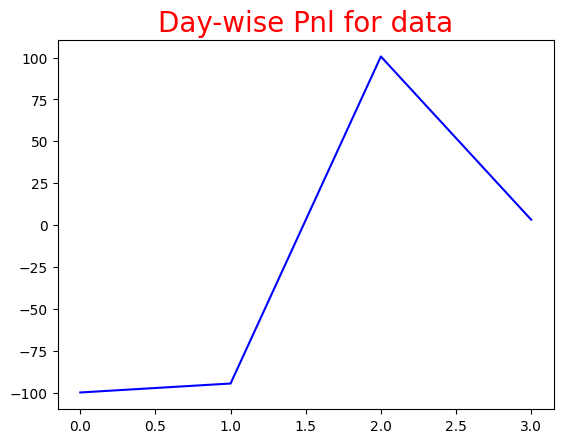

In [42]:
plt.plot(data['Pnl'], color = 'blue')
plt.title('Day-wise Pnl for data', color = 'red', fontsize = 20)
plt.show()

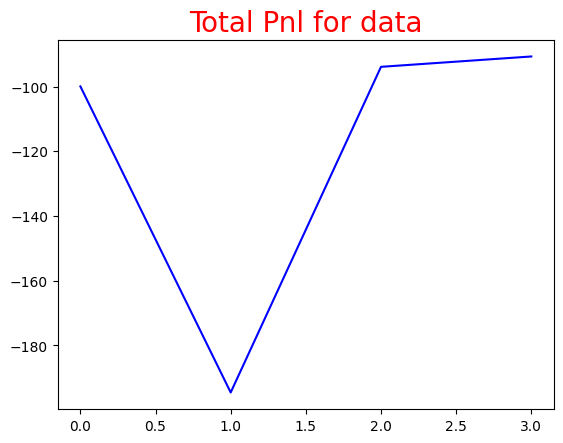

In [43]:
# plotting the Total PnL for data
plt.plot(data['Total PnL'], color = 'blue')
plt.title('Total Pnl for data', color = 'red', fontsize = 20)
plt.show()

In [44]:
# calculating drawdown using the function we created earlier
drawdown = calculate_drawdown(data['Pnl'])
drawdown

94.60000000000036

In [45]:
data

,Buy Value,Sell Value,Pnl,Total PnL
0,10902.05,10802.10,-99.95,-99.95
1,-10803.75,-10898.35,-94.60,-194.55
2,-11001.60,-10900.95,100.65,-93.90
3,-10705.15,-10701.95,3.20,-90.70


In [46]:
#creating a dictionary to insert into final table

dict = {'Type':'Relative Value', 'No. of profitable trades':(data['Pnl'] > 0).sum(),
        'No. of loss making trades':(data['Pnl'] < 0).sum(), 'Average PnL per trade':(data['Pnl'].mean()),
        'Drawdown' : drawdown, 'Sharpe' : (data.loc[3, 'Total PnL']/data['Pnl'].std())}

In [47]:
dict

{'Type': 'Relative Value',
 'No. of profitable trades': 2,
 'No. of loss making trades': 2,
 'Average PnL per trade': -22.675000000000637,
 'Drawdown': 94.60000000000036,
 'Sharpe': -0.9556514136971843}

# Third step is complete here

In [48]:
# final table

relative_value_table = pd.DataFrame(dict, index = [1])
relative_value_table

,Type,No. of profitable trades,No. of loss making trades,Average PnL per trade,Drawdown,Sharpe
1,Relative Value,2,2,-22.675,94.6,-0.955651


In [49]:
# path to export data in excel sheet

path = '/Users/akshaykumar1239/Desktop/untitled folder/output.xlsx'

# Exporting data in Excel

In [50]:
writer = pd.ExcelWriter(path, engine = 'xlsxwriter')
df.to_excel(writer, sheet_name='Polished Data', index = False)
df2.to_excel(writer, sheet_name='Pnl data for ABC', index = False)
df3.to_excel(writer, sheet_name='Final Table 1', index = False)
df4.to_excel(writer, sheet_name='Pnl for conditions')
relative_value_table.to_excel(writer, sheet_name = 'Final Table 2', index = False)
writer.close()

In [51]:
df

,Date,Tick,A,B,C,D
0,2019-01-01,09:16:00,10912.00,193.55,181.20,10900.0
1,2019-01-01,09:17:00,10912.85,194.05,181.25,10900.0
2,2019-01-01,09:18:00,10910.90,192.00,182.45,10900.0
3,2019-01-01,09:19:00,10897.00,185.80,189.80,10900.0
4,2019-01-01,09:20:00,10872.15,173.25,201.45,10900.0
...,...,...,...,...,...,...
7870,2019-01-31,15:26:00,10853.35,NaN,NaN,NaN
7871,2019-01-31,15:27:00,10852.00,NaN,NaN,NaN
7872,2019-01-31,15:28:00,10848.10,NaN,NaN,NaN
7873,2019-01-31,15:29:00,10847.00,NaN,NaN,NaN


In [52]:
df = df[['A', 'B', 'C', 'D']]
df

,A,B,C,D
0,10912.00,193.55,181.20,10900.0
1,10912.85,194.05,181.25,10900.0
2,10910.90,192.00,182.45,10900.0
3,10897.00,185.80,189.80,10900.0
4,10872.15,173.25,201.45,10900.0
...,...,...,...,...
7870,10853.35,NaN,NaN,NaN
7871,10852.00,NaN,NaN,NaN
7872,10848.10,NaN,NaN,NaN
7873,10847.00,NaN,NaN,NaN


In [53]:
std = df.std()
std

A    92.744103
B    39.867278
C    45.229178
D    86.028988
dtype: float64

In [54]:
covariance = df.cov()
covariance

,A,B,C,D
A,8601.468600,1710.032117,170.520822,7218.368849
B,1710.032117,1589.399887,965.849576,1082.999333
C,170.520822,965.849576,2045.678539,1261.444326
D,7218.368849,1082.999333,1261.444326,7400.986798


In [55]:
correlation = df.corr()
correlation

,A,B,C,D
A,1.000000,0.458014,0.040258,0.895954
B,0.458014,1.000000,0.535641,0.315767
C,0.040258,0.535641,1.000000,0.324194
D,0.895954,0.315767,0.324194,1.000000
